## **SMOTE(Synthetic Minority Oversampling Technique)**

- SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to **address imbalanced datasets** *where the minority class has significantly fewer instances than the majority class*.

- SMOTE involves *generating synthetic instances of the minority class* by **interpolating** between existing instances.

### Problem with upsampling
- Because our data is still at that position only, the variance is not increasing.
- Hence we can make use of some interpolating techniques.
- This can be achived by generating synthetic data (using SMOTE technique)
- In SMOTE technique, new data points are getting added between any 2 existing points - hence the variance is also getting increased here

## **Create a synthetic dataset**

In [1]:
from sklearn.datasets import make_classification

In [2]:
# X: independant feature, y: dependant feature
X, y = make_classification(n_samples = 1000, 
                    n_redundant = 0, # dont want this feature now(it was giving error, so we are addressing this)
                    n_features = 2, # binary classification
                    n_clusters_per_class = 1, 
                    weights = [0.90], # imbalance shd be like 9:1
                    random_state = 12
                    )

In [3]:
import pandas as pd

df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])

final_df = pd.concat([df1, df2], axis=1) # axis=1: col wise

In [4]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [5]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

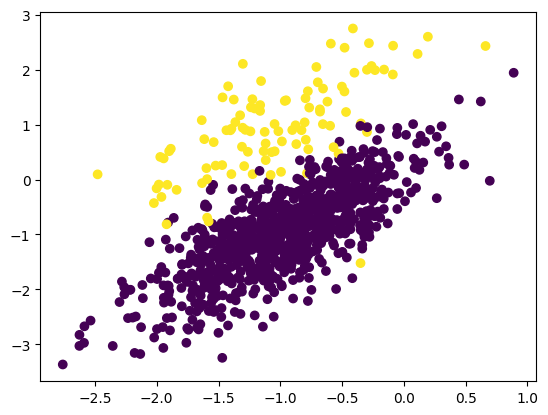

In [6]:
# create a scatter plot to visualise the datapoints

import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
# transform the dataset using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [9]:
X.shape

(1800, 2)

In [10]:
y.shape

(1800,)

In [11]:
y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int64

In [12]:
len(y[y==0])

900

In [13]:
len(y[y==1])

900

In [14]:
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

oversample_df = pd.concat([df1, df2], axis=1)

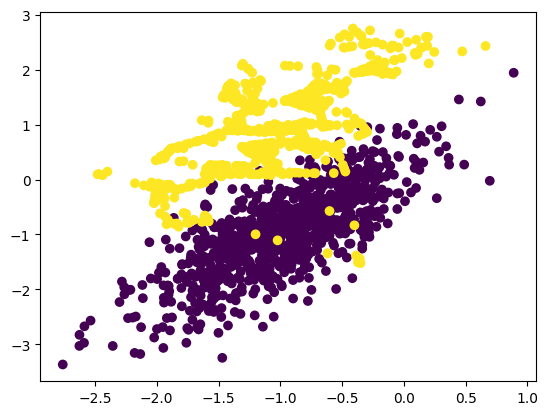

In [15]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c = oversample_df['target'])